# Tree

## 트리란?

트리는 그래프의 일종으로, 부모 노드 밑에 자식 노드가 연결되고, 자식 노드 각각에 다시 자식 노드가 연결되는 재귀적 형태의 자료구조이다. 노드들은 서로 다른 자식 노드를 가지며 이때 각 노드는 재사용 되지 않는다.

리스트나 스택 또는 큐로는 가계도나 조직도를 구현할 수 없다. 계층형 구조를 가진 문제를 해결하기 위한 자료구조 형태가 트리다.

재귀적 형태란?

어떤 사건이 자기 자신을 포함하고 다시 자기자신을 사용하여 정의될 때 재귀적이라고 한다. 

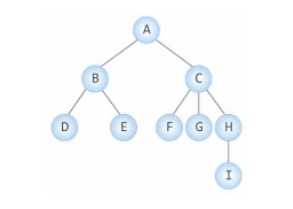

## 트리구현의 문제점

만약 하나의 노드가 여러개의 자식노드를 가지는 불규칙한 트리의 경우 노드를 구현하기가 상당히 복잡해진다.
이러한 이유로 실제로는 하나의 노드가 2개의 자식노드만 가지는 이진트리가 많이 사용된다.

# 이진트리 (Binary Tree)

## 이진트리 구현

### Node 클래스 정의

이진 탐색 트리를 구현하려면 먼저 그 재료가 되는 Node 클래스를 정의해야 한다. Node 클래스는 노드값(self.data)과 좌/우 노드(self.left, self.right), 총 세 개의 속성을 가진다. 초기화할 때는 데이터 값만 주어지고 좌우 노드가 비어있다.

In [1]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.left = self.right = None

### 삽입, 삭제, 탐색

#### 이진트리 메서드 구현

In [3]:
class BinarySearchTree(object):
    
    def __init__(self): # 비어있는 트리
        self.root = None
        
    def insert(self, data): 
        self.root = self._insert_value(self.root, data)
        return self.root is not None

    def _insert_value(self, node, data): # 데이터 삽입
        if node is None:
            node = Node(data)
        else:
            if data <= node.data:
                node.left = self._insert_value(node.left, data)
            else:
                node.right = self._insert_value(node.right, data)
        return node
    
    def find(self, key):
        return self._find_value(self.root, key)

    def _find_value(self, root, key): # 데이터 탐색
        if root is None or root.data == key:
            return root is not None
        elif key < root.data:
            return self._find_value(root.left, key)
        else:
            return self._find_value(root.right, key)
        
    def delete(self, key):
        self.root, deleted = self._delete_value(self.root, key)
        return deleted

    def _delete_value(self, node, key): # 데이터 삭제
        if node is None:
            return node, False

        deleted = False
        if key == node.data:
            deleted = True
            if node.left and node.right:
                # replace the node to the leftmost of node.right
                parent, child = node, node.right
                while child.left is not None:
                    parent, child = child, child.left
                child.left = node.left
                if parent != node:
                    parent.left = child.right
                    child.right = node.right
                node = child
            elif node.left or node.right:
                node = node.left or node.right
            else:
                node = None
        elif key < node.data:
            node.left, deleted = self._delete_value(node.left, key)
        else:
            node.right, deleted = self._delete_value(node.right, key)
        return node, deleted

#### 이진트리 주의점

이진 트리의 좌우 균형이 맞으면 탐색/삽입/삭제의 시간복잡도가 $O(\log n)$이다. 그러나 이진 탐색 트리는 정렬된 데이터에 취약하다. 오름차순이든 내림차순이든 정렬된 데이터가 입력되면 한쪽으로 치우친 (skewed) 트리가 만들어진다. 이 때, 최악의 경우 모든 데이터를 살펴야 할 수도 있어 시간복잡도가 $O(n)$이 된다.

### 트리 구현 코드  02

#### 노드 생성

In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

#### 트리 생성

In [ ]:
class Tree :
    def __init__(self, root = None) :
        self.root = root
    
    def insert(self, value) :
        node = Node(value = value) 
        # 입력받은 값으로 노드 생성
        self.pointnode = self.root 
        # 현재 가리키는 노드 = 루트노드
        
        if self.root is None : 
            self.root = node
            return
        # 루트 노드가 비어있을 경우 생성된 노드 삽입
        else :
            while True :
                if value < self.pointnode.value : 
                # 현재 포인트 노드 보다 입력된 값이 작으면 -> 왼쪽으로 가야함
                    if self.pointnode.left != None :
                        self.pointnode = self.pointnode.left
                    # 왼쪽이 비어있지 않다면 -> 그 왼쪽 노드가 새롭게 가르키는 노드(pointnode)가 됨
                    else :
                    # 왼쪽이 비어있다면
                        self.pointnode = node
                        break
                    # 그 자리의 값이 node가 됨
                else :
                # 현재 포인트 노드 보다 입력된 값이 크면 -> 오른쪽으로 가야함
                    if self.pointnode.right != None :
                        self.pointnode = self.pointnode.right
                    else :
                        self.pointnode.right = node
                        break
                        
    def search(self, value) :
        self.pointnode = self.root
        while self.pointnode is not None:
            if self.pointnode.value == value:
                print("Find Value")
                return True
            elif value < self.pointnode.value :
                self.pointnode = self.pointnode.left
            else :
                self.pointnode = self.pointnode.right
        print('Value Not Found')
        return False
    
    def delete(self, value) :
        searched = False
        self.pointnode = self.root
        self.parent = self.root
        
        # 먼저 삭제할 노드를 탐색함
        while self.pointnode :
            if self.pointnode.value == value :
                searched = True
                break # 찾으면 break
            elif value < self.pointnode.value :
                self.parent = self.pointnode
                self.pointnode = self.pointnode.left
                # 찾으려는 값이 더 작으면 pointnode 는 왼쪽으로 이동
            else :
                self.parent = self.pointnode
                self.pointnode = self.pointnode.right
                
        if searched == False :
            return False
        
        # 자식 노드가 없는 경우 삭제
        else :
            if self.pointnode.left == None and self.pointnode.right == None:
                if value < self.parent.value:
                    # 값이 작다면 왼쪽에 있을테니 왼쪽 노드를 None으로 만들어줌
                    self.parent.left = None
                else :
                    # 값이 크다면 오른쪽에 있을테니 오른쪽 노드를 None으로 변경
                    self.parent.right = None
                del self.pointnode
                
        # 자식 노드가 1개인 경우 삭제
        
            # 자식노드가 왼쪽인 경우
            if self.pointnode.left != None and self.pointnode.right == None :
                if value < self.parent.value :
                    # 지우려는 노드가 부모노드의 왼쪽인 경우 현재 노드의 자식 노드를 부모의 왼쪽으로 붙여줌
                    self.parent.left = self.pointnode.left
                else :
                    # 지우려는 노드가 부모노드의 오른쪽인 경우 현재 노드의 자식 노드를 오른쪽으로 붙여줌
                    self.parent.right = self.pointnode.left
                    
            # 자식노드가 오른쪽인 경우    
            elif self.pointnode.left == None and self.pointnode.right != None :
                if value < self.parent.value :
                    self.parent.left = self.pointnode.right
                else :
                    self.parent.right = self.pointnode.right
                    
        # 자식 노드가 2개인 경우 삭제
        # 삭제할 Node의 오른쪽 자식 중, 가장 작은값을 Parent Node가 가리키도록한다. <- 이 방법 사용
        # 또는 삭제할 노드의 왼쪽 자식 중, 가장 큰값을 Parent Node가 가리키도록한다.
        
        
            if self.pointnode.left != None and self.pointnode.right != None:
                
                # 삭제할 노드가 부모 노드의 왼쪽에 위치
                if value < self.parent.value:
                    self.change_node = self.pointnode.right
                    self.change_node_parent = self.pointnode.right

                    # 가장 작은값은 무조건 left에 있다 = 일단 left 끝까지 이동
                    while self.change_node.left != None:
                        self.change_node_parent = self.change_node
                    self.change_node = self.change_node.left

                    # 삭제할 노드의 오른쪽 자식중, 가장 작은 값을 가진 node (찾아진 change_node, 6)의 오른쪽에 chlid node(7)가 있을때
                    if self.change_node.right != None:
                        # 오른쪽에 있던 child node(7)를 change_parent(8).left로 위치 (그림에서 8 -> 7 연결과정)
                        self.change_node_parent.left = self.change_node.right
                    else:  # 삭제할 노드의 오른쪽 자식중, 가장 작은 값을 가진 node의 chlid node가 없을때
                        self.change_node_parent.left = None

                    # 위로 옮기기
                    self.parent.left = self.change_node # 6 이동
                    self.change_node.right = self.pointnode.right # 8 연결
                    self.change_node.left = self.pointnode.left # 3 연결
                    
                else:
                    self.change_node = self.pointnode.right
                    self.change_node_parent = self.pointnode.right
                    
                    while self.change_node.left != None:
                        self.change_node_parent = self.change_node
                        self.chage_node = self.change_node.left  # 비교 대상 변경
                        
                    # 3-2-2
                    if self.change_node.right != None:
                        self.change_node_parent.left = self.change_node.right
                    else:  # 3-2-1
                        self.change_node_parent.left = None

                    # 위로 옮긴다.
                    self.parent.right = self.change_node
                    self.change_node.left = self.pointnode.left
                    self.change_node.right = self.pointnode.right
        return True
                        
                    

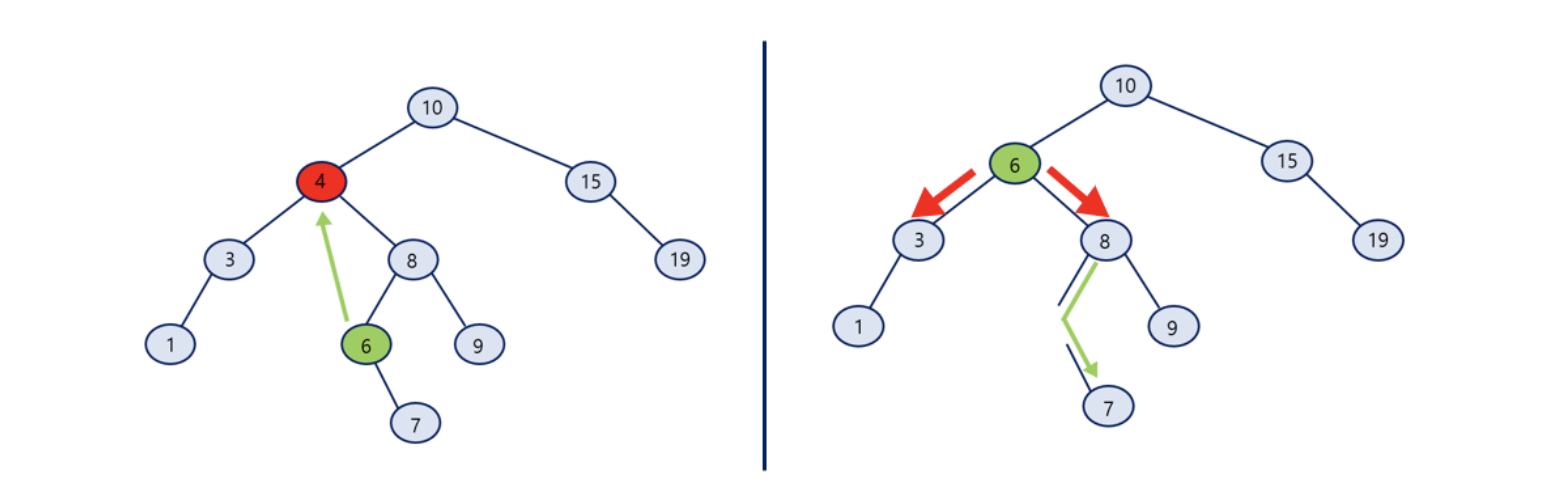

1. 삭제할 Node의 오른쪽자식 선택

2. 오른쪽 자식의 가장 왼쪽에 있는 Node 선택

3. 해당 Node를 삭제할 Node의 Parent Node의 왼쪽 브랜치가 가르키게 함.

4. 해당 Node의 왼쪽 브랜치가 삭제할 Node의 왼쪽 child Node를 가르키게 함

5. 해당 Node의 오른쪽 branch가 삭제할 Node의 오른쪽 child Node를 가르키게 함

6. 만약 해당 Node가 오른쪽 child node를 가지고 있었을 경우,

   해당 Node의 본래 Parent Node의 왼쪽 브랜치가 해당 Node의 오른쪽 child Node를 가르키게함

## 순회(Traversal) 방법

### 깊이 우선 순회 

#### 전위 순회 (Pre-order traversal)

현재 노드 n -> 왼쪽 서브트리 -> 오른쪽 서브트리 순회

In [3]:
def preorder(self, n):
    if n!=None:
        print(n.value,'',end='') # 노드방문
        if n.left:
            self.preorder(n.left) # 왼쪽 서브트리 순회
        if n.right:
            self.preorder(n.right) # 오른쪽 서브트리 순회

#### 중위 순회 (In-order traversal)

왼쪽 서브트리 -> 현재 노드 n -> 오른쪽 서브트리 순회

이진탐색 트리를 정순회하면 정렬된 데이터를 얻을 수 있다.

In [4]:
def inorder(self, n):
    if n != None:
        if n.left :
            self.preorder(n.left) # 왼쪽 서브트리 순회
        print(n.value,'',end='') # 노드 방문
        if n.right :
            self.preorder(n.right) # 오른쪽 서브트리 순회

#### 후위 순회 (Postorder Traversal)

왼쪽 서브트리 -> 오른쪽 서브트리 -> 현재 노드 n

In [5]:
def postorder(self,n):
    if n != None :
        if n.left :
            self.preorder(n.left) # 왼쪽 서브트리 순회
        if n.right :
            self.preorder(n.right) # 오른쪽 서브트리 순회
        print(n.value,'',end='') # 노드 방문

#### 레벨 순회 (Level-order Traversal)

루트가 있는 곳부터 각 레벨마다 좌에서 우로 노드들을 방문

In [1]:
def levelorder(self, root):
    q = [] # 큐로 사용하기 위해 리스트 구현
    q.append(root)
    while q:
        t = q.pop(0)
        print(t.value,'',end='') # 큐에서 첫 항목 삭제하고 삭제한 노드 방문
        if t.left != None:
            q.append(t.left) # 왼쪽 자식 큐에 삽입
        if t.right != None:
            q.append(t.right) # 오른쪽 자식 큐에 삽입
            
# https://yjg-lab.tistory.com/132

선입 선출 기반의 큐를 사용하는 순회법입니다. 만나는 노드를 꺼내서 출력하고 서브트리를 왼쪽부터 큐에 넣는다 만 기억하면 됩니다.

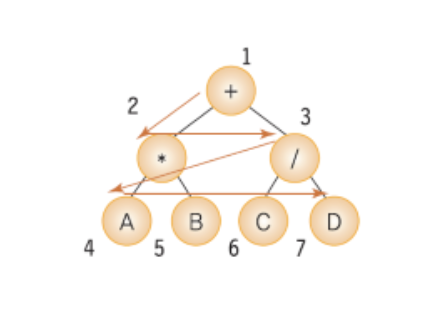

# 정 이진트리 (Full Binary Tree)

정 이진트리는 트리의 모든 노드가 0개 혹은 2개의 자식을 가지는 경우이다. 즉 자식을 하나만 가지는 노드가 없어야 한다.

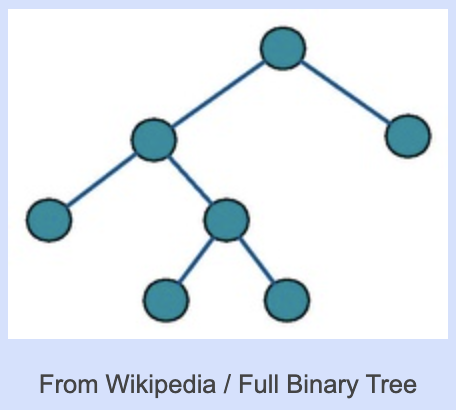

In [8]:
# Checking full binary tree
def isFullTree(root):
    
    # Tree empty case
    if root is None:
        return True

    # Checking whether child is present
    if root.leftChild is None and root.rightChild is None:
        return True

    if root.leftChild is not None and root.rightChild is not None:
        return (isFullTree(root.leftChild) and isFullTree(root.rightChild))

    return False


# 완전 이진트리 (Complete Binary Tree)

완전 이진트리는 마지막 레벨을 제외한 나머지 노드가 꽉 차있어야 하며, 마지막 레벨의 노드도 왼쪽으로 몰려 있어야 한다.

완전이진트리는 트리의 높이가 h일 때, h-1층까지는 모든 노드들이 꽉 채워져있고 h번째 층의 값들은 왼쪽부터 차례로 채워져 있는 트리를 말한다.

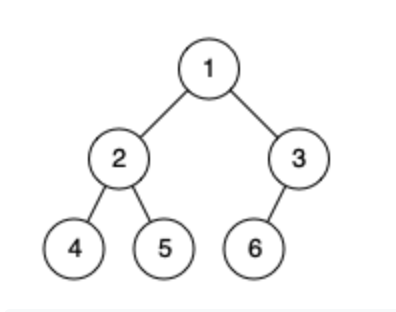

Every level before the last is full (ie. levels with node-values {1} and {2, 3}), and all nodes in the last level ({4, 5, 6}) are as far left as possible.

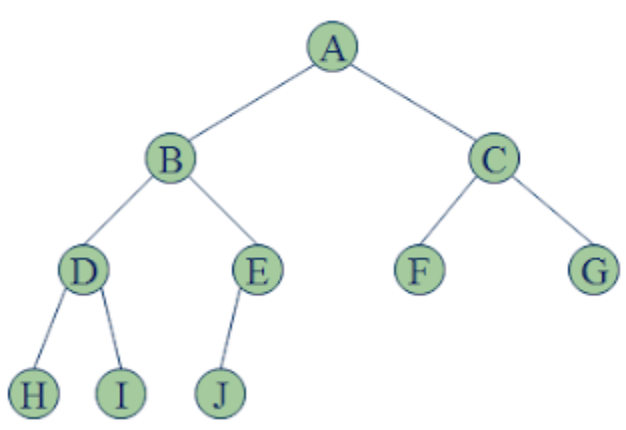

## Full and Complete binary tree 

2가지 큰 차이가 있습니다.
- 모든 leaf 원소는 왼쪽에 몰려있음.
- 마지막 레벨 노드는 오른쪽 자식이 없음 -> Complete binary tree는 Full binary tree일 필요가 없음

### Perfect Tree ?

모든 노드가 2개의 자식노드를 가지며, leaf 노드가 같은 레벨에 존재함

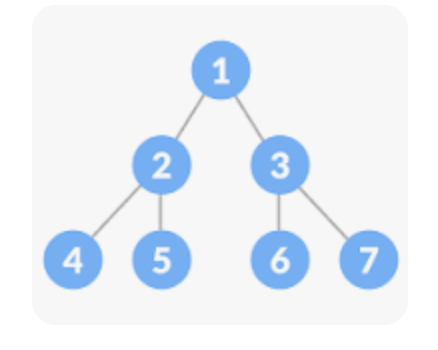

### Full vs Complete

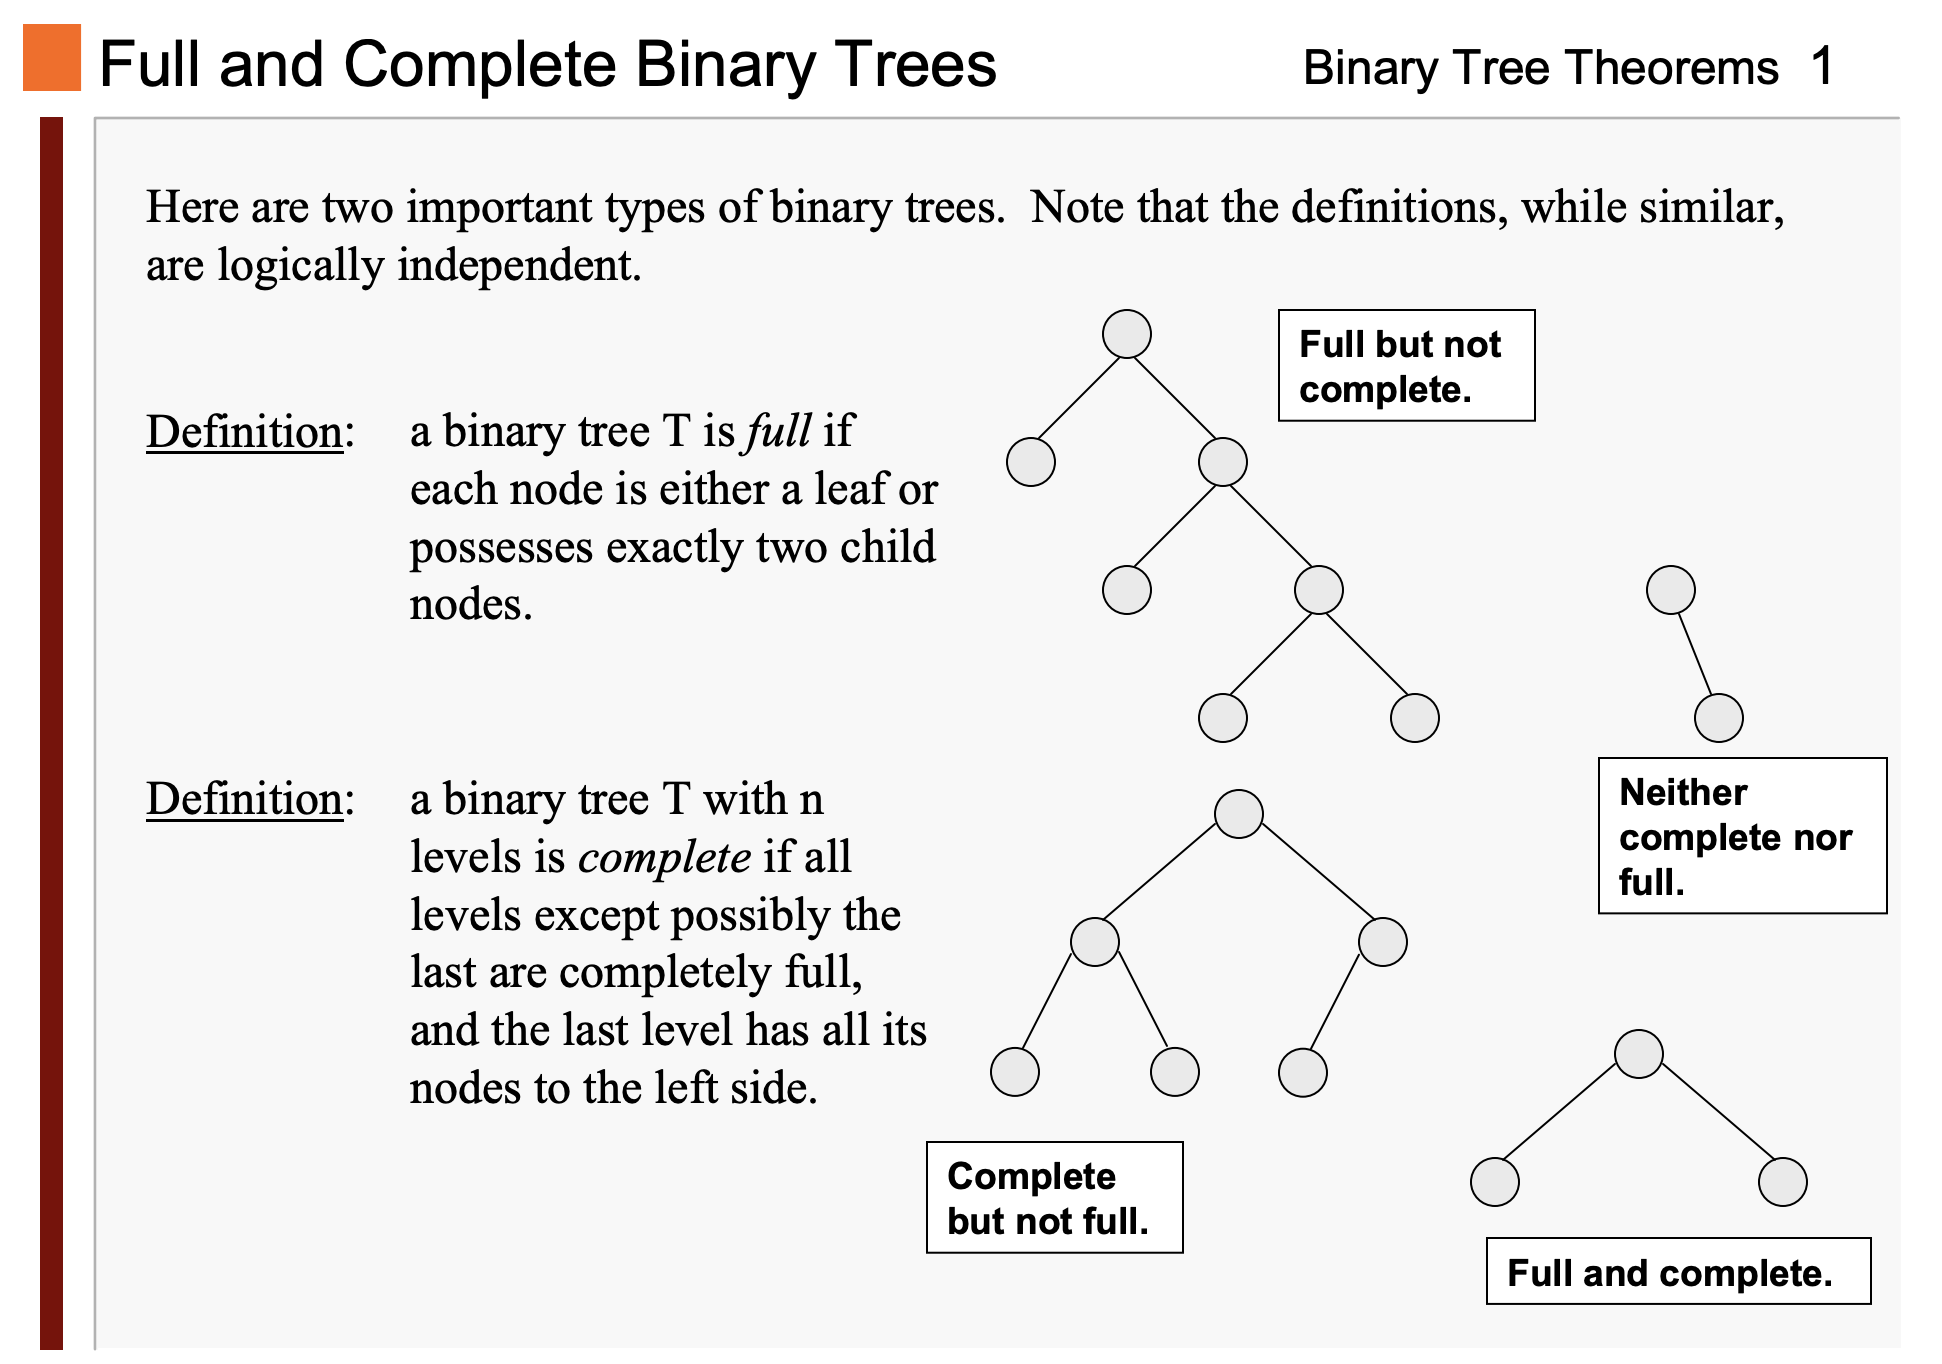

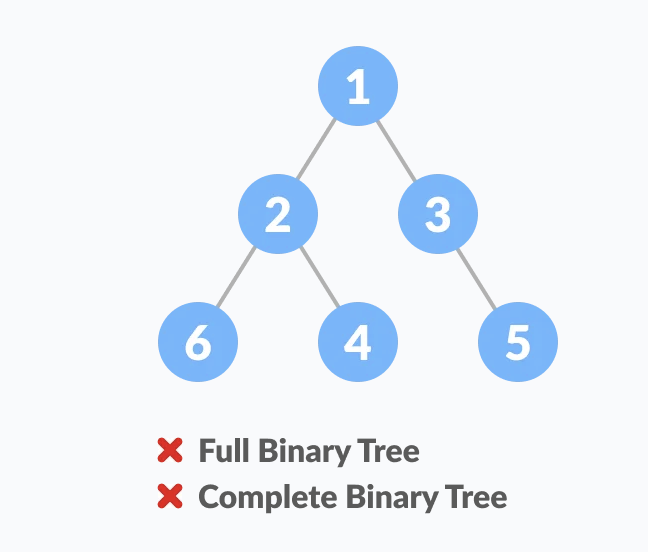

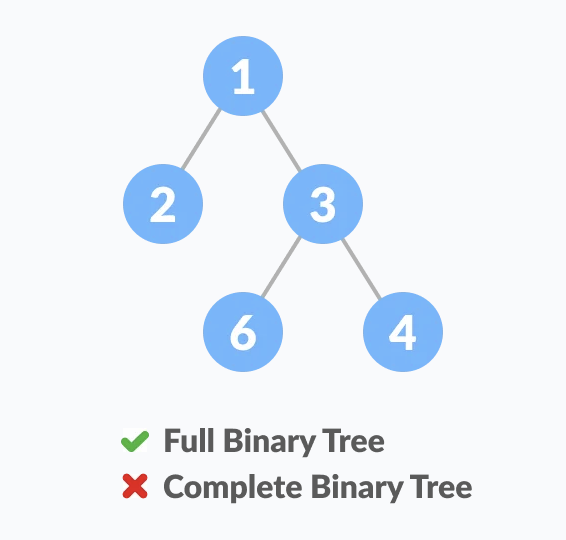

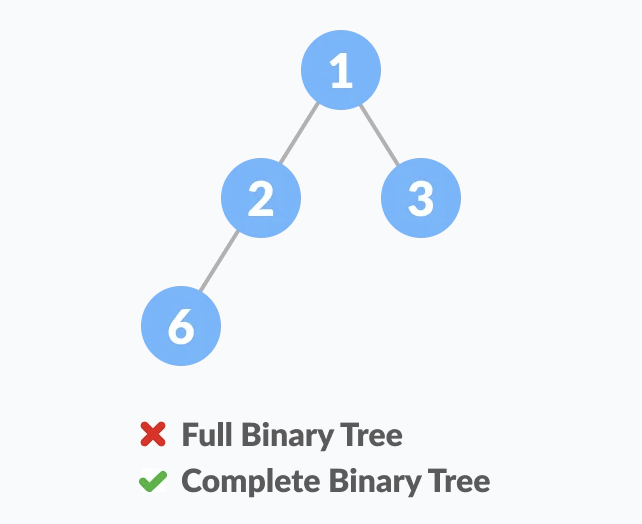

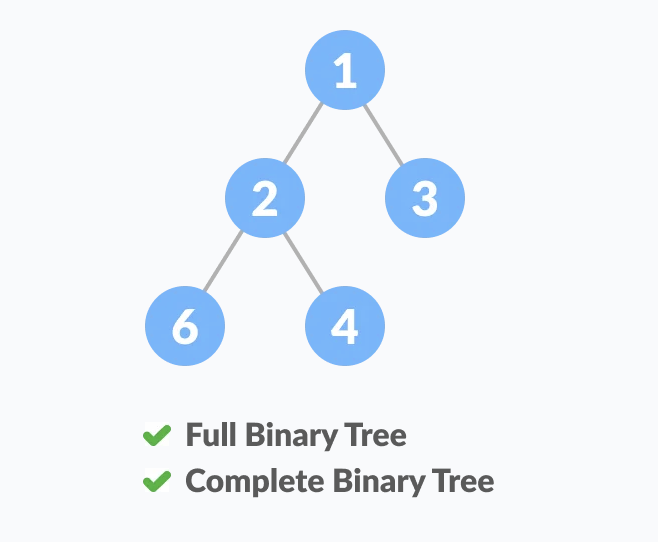

## What is almost complete binary tree ?

Full Binary Tree = Strictly Binary Tree

- Strictly binary tree = Full Binary Tree
- Complete -> strictly binary tree 이며 leaf 가 같은 'maximum'레벨에 존재함
- Almost complete -> Complete 일때, 마지막 레벨이 full 일수도 아닐수도 있는데, 마지막 레벨이 꽉 차있지 않은 경우이다. Complete binary tree인 경우가 맞으며 어떤 경우의 수 중 하나이다

여러 책에서 다르게 설명되고 있습니다. 완전 이진트리의 설명이 (완전 이진트리는 마지막 레벨을 제외한 나머지 노드가 꽉 차있어야 하며, 마지막 레벨의 노드도 왼쪽으로 몰려 있어야 한다) 어떤 책에서는 almost complete tree 라고 설명되어 있습니다. Full Binary Tree 가 Complete Binary Tree 로, strictly Binary Tree가 Full Binary Tree로 설명하는 경우도 있습니다. 

A complete binary tree is a binary tree in which all the levels are completely filled except possibly the lowest one, which is filled from the left

트리의 속성에 따라 구분하는 이유? 못찾음

## checking Complete Binary Tree Code 01

In [ ]:
# Check whether a binary tree is complete or not

# 이코드의 문제점은 마지막 (-1) 레벨 노드의 자식 노드가 왼쪽에 몰려있는 Complete Binary tree 인 경우에도 False 를 반환함
  
# A binary tree node
class Node:
  
    # Constructor to create a new node
    def __init__(self, data):
        self.data = data 
        self.left = None
        self.right = None
  
# Given a binary tree, return true if the tree is complete
# else return false
def isCompleteBT(root):
      
    # Base Case: An empty tree is complete Binary tree
    if root is None:
        return True
  
    # Create an empty queue
    queue = []
  
    # Create a flag variable which will be set True
    # when a non-full node is seen -> what is non-full node ? -> 
    # Full nodes are those nodes who have both the children and no child is null
    flag = False
  
    # Do level order traversal using queue
    queue.append(root)
    while(len(queue) > 0):
        tempNode = queue.pop(0) # Dequeue 
  
        # Check if left child is present
        if (tempNode.left):
              
            # If we have seen a non-full node, and we see
            # a node with non-empty left child, then the
            # given tree is not a complete binary tree
            
            ## 자식이 하나 존재하고, 왼쪽에 자식이 있다면 False를 반환하도록 되어있음.
            if flag == True :
                return False
  
            # Enqueue left child
            queue.append(tempNode.left)
  
            # If this a non-full node, set the flag as true
        else:
            flag = True
  
        # Check if right child is present
        if(tempNode.right):
                  
            # If we have seen a non full node, and we 
            # see a node with non-empty right child, then
            # the given tree is not a complete BT
            if flag == True:
                return False
  
            # Enqueue right child
            queue.append(tempNode.right)
              
        # If this is non-full node, set the flag as True
        else:
            flag = True
          
    # If we reach here, then the tree is complete BT
    return True

leetcode 958. Check Completeness of a Binary Tree

leetcode에서 Binary Tree 의 Completness를 체크하는 문제가 있었습니다. BFS / DFS 두가지 방식으로 문제풀이가 진행됨.

https://leetcode.com/problems/check-completeness-of-a-binary-tree/discuss/205682/JavaC%2B%2BPython-BFS-Solution-and-DFS-Soluiton

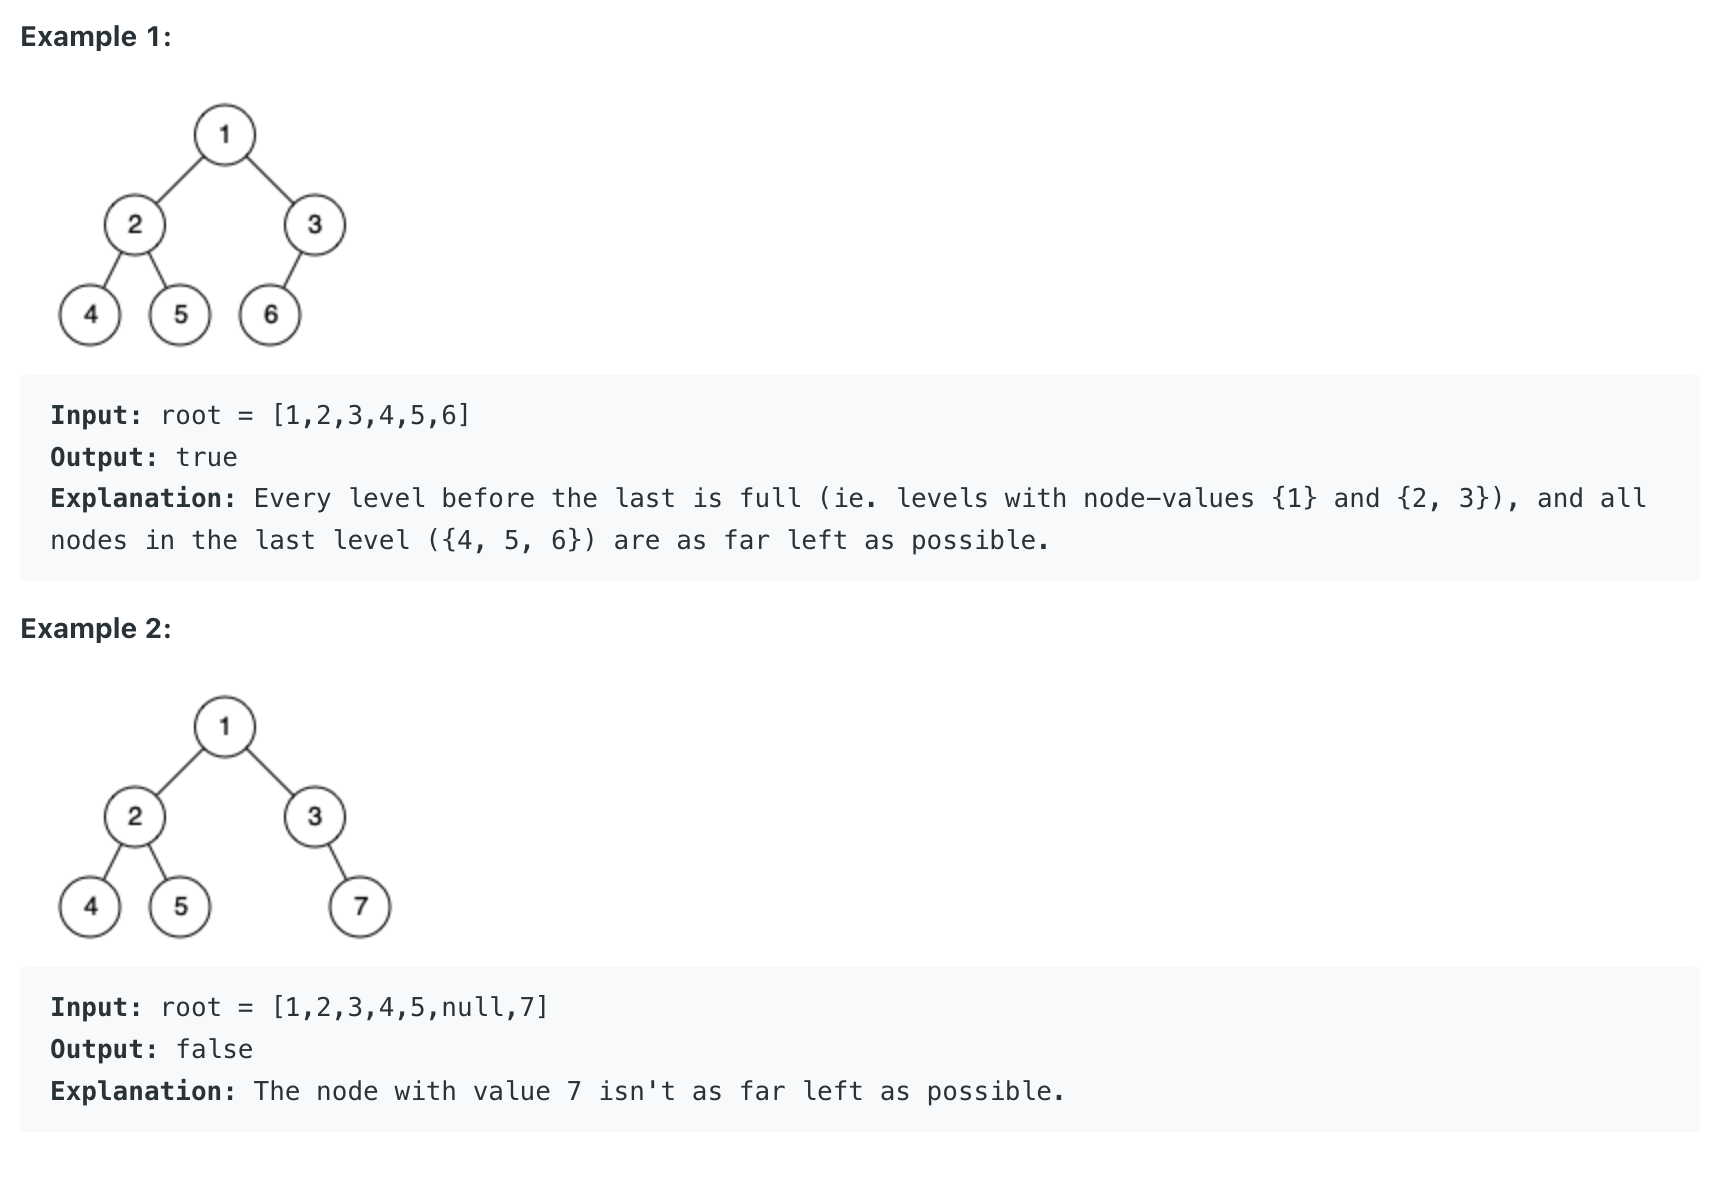

### BFS 방식

In [1]:
# BFS 방식

def isCompleteTree(self, root):
    
    need_visit = [root]
    prev = root

    while need_visit:
        node = need_visit.pop(0)
        if node :
            if not prev :
                return False
            need_visit.append(node.left)
            need_visit.append(node.right)
        prev = node

    return True

|q|node|prev|
|---|---|---|
|[5, None, 7]|4|3|
|[None, 7, None, None]| 5| 4|
|[7, None, None, None, None] |None |5|
|[None, None, None, None]| 7|None|

In [ ]:
# BFS 방식 2

def isCompleteTree(self, root):

    q = [root]
    flag = False

    while q :
        node = q.pop(0)

        if not node :
            flag = True
        else :
            if flag :
                return False
            else :
                q.append(node.left)
                q.append(node.right)

    return True

In [ ]:
# BFS 방식 3

def isCompleteTree(self, root):
    bfs = [root]
    i = 0
    while bfs[i]:
        bfs.append(bfs[i].left)
        bfs.append(bfs[i].right)
        i += 1
    return not any(bfs[i:])

### DFS 방식

if root is a complete tree , dfs(root) return the count of nodes in a tree, otherwise it will return -1

Complete 트리면 노드 카운트를 리턴하고, 아니면 -1 리턴

---

If a tree is a complete FULL tree,
it must have 1,3,7,15,31..nodes,
which is pow of 2 minus 1.
And for $x = 2^k -1$, $x$ has a property that $x & (x+1) == 0$.

Complete Full Tree (= perfect 트리를 말하는듯) 이라면 1, 3, 7, 15, 31 개의 노드를 가진다. 2의 제곱 -1 이다.
$x = 2^k -1$ 이므로 $x & (x+1) == 0$ 이다.

---

For a complete tree, it must satify at least one of the following condition:
if left subtree is a full tree with l nodes,
right subtree must have r nodes that l / 2 <= r <= l
if right subtree is a full tree with r nodes,
left subtree must have l nodes that r <= l <= r * 2 + 1.

Complete Tree 이기 위해서 만족해야할 조건

- Left sub Tree 가 Full 이고 L개의 노드를 가질때 -> Right sub Tree는 $L / 2 <= R <= L$
- Right sub Tree 가 Full 이고 R개의 노드를 가질때 -> Left sub Tree는 $R <= L <= R*2 +1$







In [ ]:
def isCompleteTree(self, root):
    def dfs(root):
        if not root: return 0
        l, r = dfs(root.left), dfs(root.right)
        if l & (l + 1) == 0 and l / 2 <= r <= l:
            return l + r + 1
        if r & (r + 1) == 0 and r <= l <= r * 2 + 1:
            return l + r + 1
        return -1
    return dfs(root) > 0